## Machine Learning Model Building Pipeline: Feature Selection

In this section, we will cover Feature Engieering aspects of Machine Learning Model Building pipeline. For ease of understanding, we will create a separate notebook for each of the following parts of the Machine Learning pipeline. 
1. Data preparation and Exploratory Data Analysis (EDA)
2. Feature Engineering
3. Feature Selection
4. Model Building

*This is the notebook for Feature Selection*

We will use the house price dataset available on [Kaggle.com]
<br/>(https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). 
<br/>See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning regression model to predict the price of home based on different attributes of the house. Obviously, being able to predict the price of the house is of great importance to both the buyer and seller of the house in addition to investors (to figure out whether the proposed price is either over estimated or under estimated)

### Goal of the modeling problem

The goal of the project is to predict the price of the house as close as possible to the actual sale price historically.

### Data for the problem

The data can be downloaded from the following website
<br/>https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
<br/>Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'Housing_Data.csv' and save it in a directory named "DataSets".

====================================================================================================

## House Prices dataset: Feature Selection

In the following cells, we will select a group of variables, the most predictive ones, to build our machine learning models. 

### Why do we need to select variables?

1. For production: Fewer variables mean lesser client input requirements which reduces chances of mistakes
2. For model performance: Fewer variables mean simpler, more interpretable, less over-fitted models which are more generalizable
3. For deployment: Fewer features means lesser computations and faster batch job completion. This is a very important consideration for large scale deployment applications


**We will select variables using the Lasso regression: Lasso has the property of setting the coefficient of non-informative variables to zero (unlike ridge regression). This way we can identify those variables and remove them from our final models.**

### Setting the seed

It is important to note, that we are engineering variables and pre-processing data with the idea of deploying the model if we find business value in it. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

This is perhaps one of the most important lessons that you need to take away from this course: **Always set the seeds**.

Let's go ahead and load the dataset.

In [1]:
# To handle datasets. These are standard imports
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# to display data with high width
pd.set_option('display.width', 1000)

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2]:
# Make the output of notebook stable across runs by setting randon seed
np.random.seed(42)

# To make the pictures pretty
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Set up directories to work with datasets and images
PROJECT_ROOT_DIR = os.getcwd()
DATASET_FOLDER = "DataSets"    # Data goes into the DataSets folder
IMAGES_FOLDER = "IMAGES"       # Images go into IMAGES folder

DATASET_PATH = os.path.join(PROJECT_ROOT_DIR, DATASET_FOLDER)
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, IMAGES_FOLDER)

def load_data(filename, dataset_path=DATASET_PATH,**kwargs):
    """Helper Function to load data. Inputs are file name and directory where datasets are stored"""
    file_with_path = os.path.join(dataset_path, filename)
    return pd.read_csv(file_with_path,**kwargs)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Helper Function to save data. Inputs are file name and directory where datasets are stored"""
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# load dataset from previous section
# We  load the datasets with the engineered values: we built and saved these datasets in the previous lecture.
# If you haven't done so, go ahead and check the previous lecture / notebook to find out how to create these datasets

X_train = load_data(filename="xtrain.csv")
X_test = load_data(filename="xtest.csv")

# visualise the dataset by printing the first three rows
print("\nThe first 3 rows of training data frame:")
X_train.head()


The first 3 rows of training data frame:


,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,1.0,0.461171,0.377048,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.777778,0.50,0.014706,0.049180,0.25,0.285714,0.6,0.666667,0.5,0.00000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.0,0.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.0,0.416667,1.0,0.000000,0.0,1.0,0.018692,0.0,0.75,0.430183,0.333333,0.666667,0.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.545455,0.75,0.5,1.0,0.0,0.0,0.0
1,657,11.887931,0.000000,1.0,0.456066,0.399443,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.444444,0.75,0.360294,0.049180,0.25,0.285714,0.6,0.666667,0.5,0.03375,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.0,0.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.0,0.250000,1.0,0.000000,0.0,1.0,0.457944,0.0,0.25,0.220028,0.333333,0.666667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.636364,0.50,0.5,1.0,0.0,0.0,0.0
2,46,12.675764,0.588235,1.0,0.394699,0.347082,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.888889,0.50,0.036765,0.098361,0.25,0.285714,0.6,0.666667,0.5,0.25750,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.0,0.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,0.0,0.333333,1.0,0.333333,0.0,1.0,0.046729,0.0,0.50,0.406206,0.333333,0.666667,0.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.090909,1.00,0.5,1.0,0.0,0.0,0.0
3,1349,12.278393,0.000000,1.0,0.388581,0.493677,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.666667,0.50,0.066176,0.163934,0.25,0.285714,0.6,0.666667,0.5,0.00000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.0,0.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.0,0.250000,1.0,0.333333,0.0,1.0,0.084112,0.0,0.50,0.362482,0.333333,0.666667,0.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.636364,0.25,0.5,1.0,1.0,0.0,0.0
4,56,12.103486,0.000000,1.0,0.577658,0.402702,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.555556,0.50,0.323529,0.737705,0.25,0.285714,0.6,0.666667,0.5,0.17000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.086818,0.0,0.0,0.434278,0.233224,1.0,1.0,0.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.0,0.416667,1.0,0.333333,0.0,1.0,0.411215,0.0,0.50,0.406206,0.333333,0.666667,0.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,1.0,0.333333,0.0,0.545455,0.50,0.5,1.0,0.0,0.0,0.0


In [4]:
# capture the target variable to be modeled in both train and test sets

if 'SalePrice' in X_train.columns:
    y_train = X_train['SalePrice']
    y_test = X_test['SalePrice']

    # drop unnecessary variables from our training and testing sets
    X_train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
    X_test.drop(['Id', 'SalePrice'], axis=1, inplace=True)
else:
    print("SalePrice column not found. You may have run this function already!")

### Feature Selection

Let's go ahead and select a subset of the most useful features by using various methods such as univaraite, heatmap, feature importance (lasso regression). The following is an example of univariate selection method

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = X_train  #independent columns
y = np.asarray(y_train, dtype="int") #target column i.e SalePrice
bestfeatures = SelectKBest(score_func=chi2, k=10) #apply SelectKBest class to extract top 10 best features
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  # print 10 best features

           Feature       Score
81  GarageYrBlt_na  122.065220
19    YearRemodAdd  110.259689
18       YearBuilt   78.053131
55      Fireplaces   58.124558
58     GarageYrBlt   49.586348
49        HalfBath   44.118723
60      GarageCars   37.449372
43        2ndFlrSF   36.590738
25      MasVnrArea   35.892514
48        FullBath   31.231971


The below code will help in finding the features using the Heapmap method

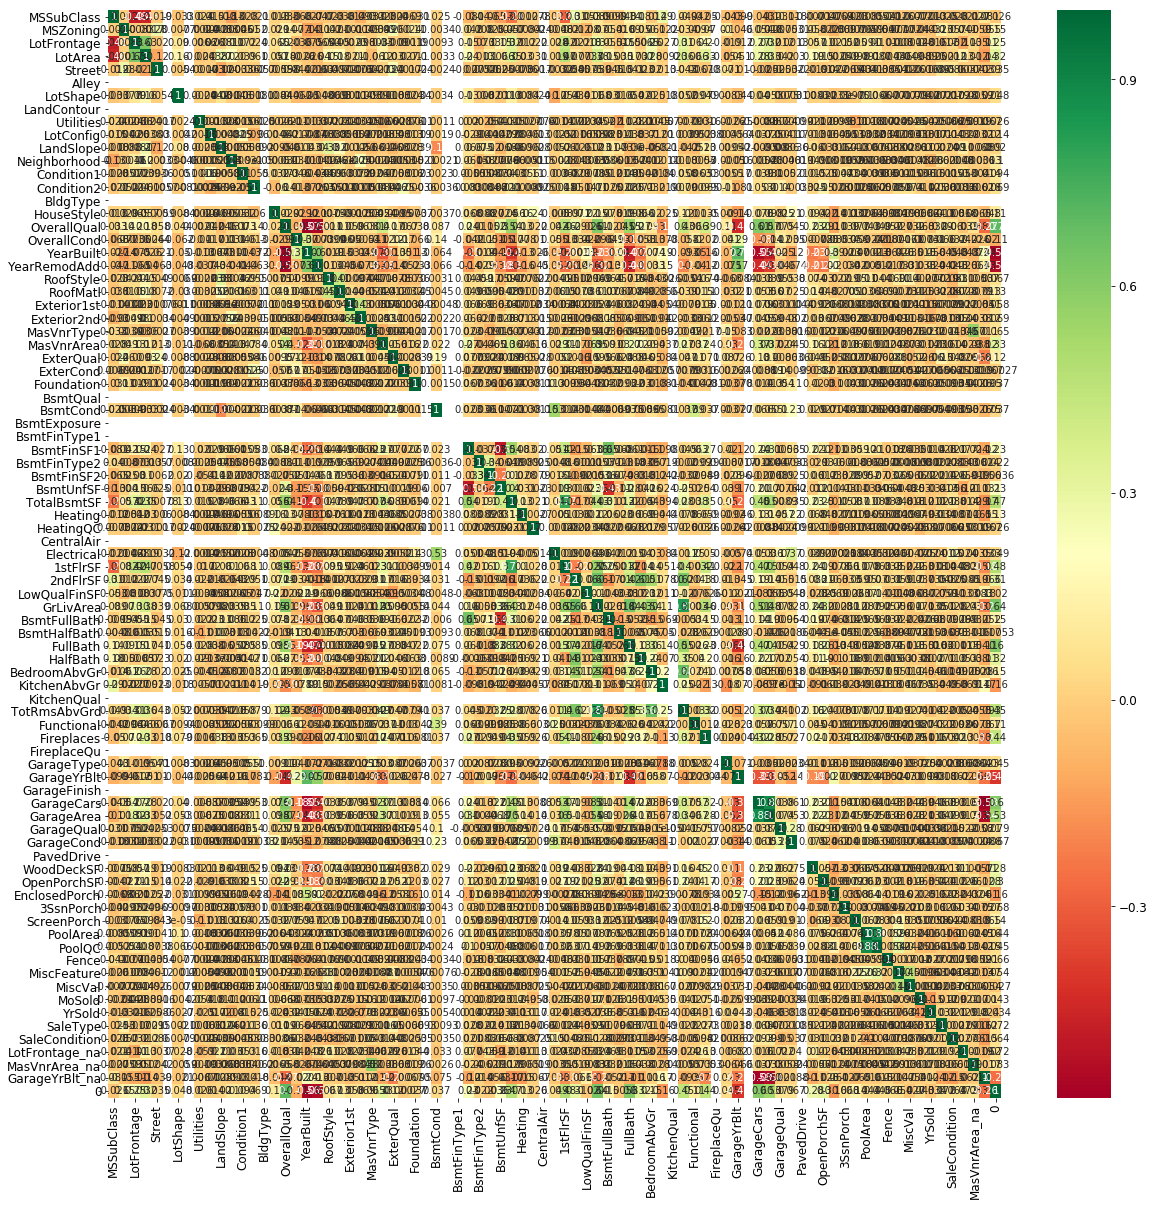

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
X = X_train  #independent columns
y = np.asarray(y_train, dtype="int") #target column i.e SalePrice
#get correlations of each features in dataset
data = pd.concat([X,pd.Series(y)],axis=1)
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Let's go ahead and select a subset of the most useful features by using Lasso regression method. There is an element of randomness in the Lasso regression, so remember to set the seed.

In [52]:
# here I will do the model fitting and feature selection both simultaneously

# first, I specify the Lasso Regression model, and I select a suitable alpha (equivalent of penalty).
# The bigger the alpha, lesser the features that will be selected

# Then I use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero

sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [53]:
# this command let's us visualise those features that were kept.
# Kept features have a True indicator
sel_.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [54]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 82
selected features: 22
features with coefficients shrank to zero: 60


In [55]:
# print the selected features
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'GarageYrBlt_na'], dtype='object')

### Identify the selected variables

In [56]:
# this is an alternative way of identifying the selected features 
# based on the non-zero regularisation coefficients:
selected_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feats

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'GarageYrBlt_na'], dtype='object')

In [57]:
# now we save the selected list of features
pd.Series(selected_feats).to_csv(os.path.join(DATASET_PATH,r'selected_features.csv'), index=False)